In [1]:
%autosave 0
%matplotlib inline

Autosave disabled


# suneku.classifier

In [2]:
from suneku import hello
from suneku.classifier import LogisticClassifier, traintest

In [3]:
hello(LogisticClassifier)

type

    Classify rows of a matrix into one of several categories.
    Return a DataFrame with category and probability for each row.

    Initialize using training data with known categories.
    Pre-processing and learning are automatic.
    Call with new data to classify each row.

    Input
        data    any valid DataFrame input: Training data.
        target  string or int: Name of column with known classes.
        **kwargs are passed to scikit-learn model.
    


## demo

In [4]:
hello(LogisticClassifier.demo)

method

        LogisticClassifier: Example with pre-loaded data.
        Uses Fisher's iris dataset from scikit-learn.
        


In [5]:
demo = LogisticClassifier.demo()
print(demo)

LogisticClassifier
target  : species
samples : 150
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


In [6]:
demo.data.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## partition rows into training and testing

In [7]:
training,testing = traintest(demo.data,0.33)
training.sample(5)

49 training rows
101 testing rows


,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
21,setosa,5.1,3.7,1.5,0.4
105,virginica,7.6,3.0,6.6,2.1
64,versicolor,5.6,2.9,3.6,1.3
58,versicolor,6.6,2.9,4.6,1.3
70,versicolor,5.9,3.2,4.8,1.8


## build a LogisticClassifier
Pre-processing and learning are automatic.

In [8]:
params = {'penalty':'l1','solver':'liblinear'}
logclass = LogisticClassifier(training,'species',**params)
print(logclass)

LogisticClassifier
target  : species
samples : 49
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


## inspect data

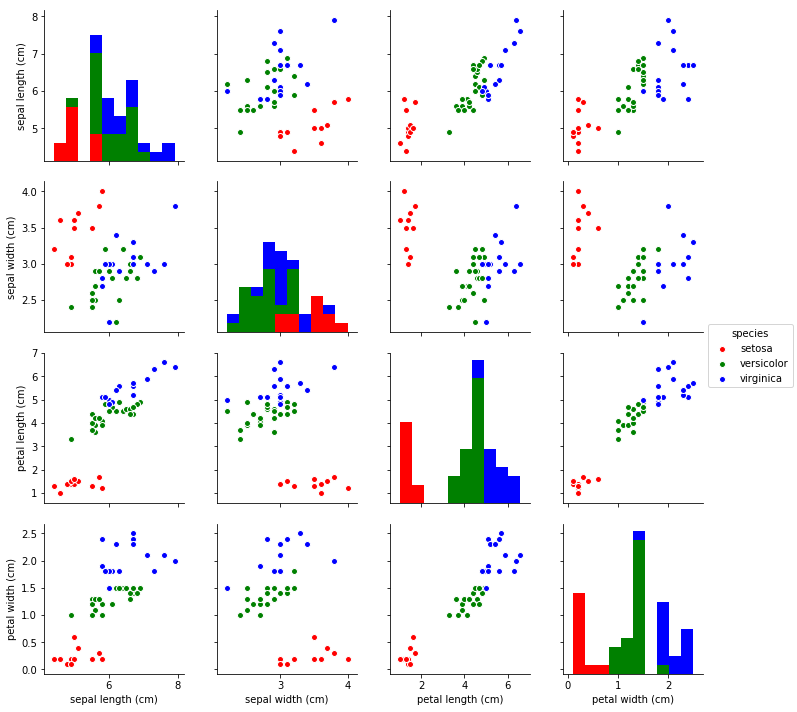

In [9]:
logclass.show(palette=list('rgb'))

## classify things

In [10]:
result = logclass(testing)
result.sample(5)

,class,p_class
122,virginica,0.529613
59,versicolor,0.569053
113,versicolor,0.503172
3,setosa,0.639684
142,versicolor,0.481463


In [11]:
probs = logclass.probs(testing)
probs.sample(5)

,setosa,versicolor,virginica
24,0.751509,0.234072,0.014419
100,0.061237,0.244227,0.694536
53,0.068991,0.708748,0.222261
9,0.637220,0.352647,0.010133
83,0.067646,0.557110,0.375244


## test with known classes

In [12]:
test1 = logclass.test(testing)
print('Worst predictions:')
test1.nlargest(5,'surprise')

85.1% correct

class       setosa  versicolor  virginica
species                                  
setosa          38           1          0
versicolor       0          24          3
virginica        0          11         24

Worst predictions:


,class,correct,p_class,reality,surprise
134,versicolor,False,0.648581,virginica,1.508737
41,versicolor,False,0.647299,setosa,1.503483
133,versicolor,False,0.564306,virginica,1.198613
50,versicolor,True,0.443977,versicolor,1.171444
84,versicolor,True,0.444504,versicolor,1.169731


## inspect model

In [13]:
print(logclass.model)
logclass.coefs()

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.538356,0.793966,-0.350385,-0.839756
versicolor,0.000000,-0.954691,0.000000,0.000000
virginica,0.000000,0.000000,0.000000,2.325275


## try again with new parameters

In [14]:
logclass.learn(multi_class='multinomial',penalty='l2',solver='lbfgs')
logclass.coefs()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-1.100338,1.283822,-1.737286,-1.658837
versicolor,0.831371,-0.568940,-0.633931,-0.991397
virginica,0.268967,-0.714882,2.371217,2.650234


In [15]:
test2 = logclass.test(testing)
print('Worst predictions:')
test2.nlargest(5,'surprise')

96.0% correct

class       setosa  versicolor  virginica
species                                  
setosa          38           1          0
versicolor       0          26          1
virginica        0           2         33

Worst predictions:


,class,correct,p_class,reality,surprise
133,versicolor,False,0.662100,virginica,1.565330
41,versicolor,False,0.629753,setosa,1.433440
134,versicolor,False,0.525776,virginica,1.076360
83,virginica,False,0.499491,versicolor,0.998533
129,virginica,True,0.544320,virginica,0.877474
